In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import threadpoolctl

In [3]:
# Setting up the number of threads to prevent memory leak
os.environ["OMP_NUM_THREADS"] = "2"

# Generate synthetic dataset
np.random.seed(42)
num_samples = 320

# Generate random data
customer_ids = range(1, num_samples + 1)
ages = np.random.randint(18, 70, size=num_samples)  # Ages between 18 and 70
genders = np.random.choice(['Male', 'Female'], size=num_samples)  # Random genders
total_spent = np.random.uniform(100, 5000, size=num_samples)  # Total amount spent
num_purchases = np.random.randint(1, 50, size=num_samples)  # Number of purchases
avg_order_value = total_spent / num_purchases  # Average order value
time_since_last_purchase = np.random.randint(0, 365, size=num_samples)  # Days since last purchase
newsletter_subscription = np.random.choice(['Yes', 'No'], size=num_samples)  # Subscription status

# Creating a DataFrame
data = pd.DataFrame({
    'Customer ID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'Total amount spent in the last year': total_spent,
    'Number of purchases in the last year': num_purchases,
    'Average order value': avg_order_value,
    'Time since last purchase (in days)': time_since_last_purchase,
    'Newsletter subscription': newsletter_subscription
})

# Save to CSV

data.to_csv("Ecommerce_data.csv")

In [5]:
data

,Customer ID,Age,Gender,Total amount spent in the last year,Number of purchases in the last year,Average order value,Time since last purchase (in days),Newsletter subscription
0,1,56,Female,3167.104383,2,1583.552192,164,Yes
1,2,69,Male,4120.091534,15,274.672769,181,Yes
2,3,46,Female,3292.275382,11,299.297762,222,No
3,4,32,Female,1112.753363,8,139.094170,310,No
4,5,60,Male,1442.409524,26,55.477289,6,No
...,...,...,...,...,...,...,...,...
315,316,25,Male,125.970031,24,5.248751,104,No
316,317,53,Male,4877.829098,14,348.416364,322,Yes
317,318,55,Male,2504.669018,32,78.270907,122,No
318,319,57,Male,3642.190873,46,79.178062,28,No


In [11]:
print(data.head())

   Customer ID  Age  Gender  Total amount spent in the last year  \
0            1   56  Female                          3167.104383   
1            2   69    Male                          4120.091534   
2            3   46  Female                          3292.275382   
3            4   32  Female                          1112.753363   
4            5   60    Male                          1442.409524   

   Number of purchases in the last year  Average order value  \
0                                     2          1583.552192   
1                                    15           274.672769   
2                                    11           299.297762   
3                                     8           139.094170   
4                                    26            55.477289   

   Time since last purchase (in days) Newsletter subscription  
0                                 164                     Yes  
1                                 181                     Yes  
2             

In [13]:
data.describe()

,Customer ID,Age,Total amount spent in the last year,Number of purchases in the last year,Average order value,Time since last purchase (in days)
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,160.500000,43.418750,2558.906729,24.825000,274.135830,180.078125
std,92.520268,15.264429,1382.634582,14.283098,625.645297,105.957036
min,1.000000,18.000000,112.715619,1.000000,4.025558,1.000000
25%,80.750000,30.750000,1396.672671,11.000000,51.626726,88.000000
50%,160.500000,43.500000,2574.266543,26.000000,103.980514,185.000000
75%,240.250000,56.000000,3711.554036,37.000000,221.485707,268.250000
max,320.000000,69.000000,4986.552120,49.000000,4932.659280,364.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Customer ID                           320 non-null    int64  
 1   Age                                   320 non-null    int32  
 2   Gender                                320 non-null    object 
 3   Total amount spent in the last year   320 non-null    float64
 4   Number of purchases in the last year  320 non-null    int32  
 5   Average order value                   320 non-null    float64
 6   Time since last purchase (in days)    320 non-null    int32  
 7   Newsletter subscription               320 non-null    object 
dtypes: float64(2), int32(3), int64(1), object(2)
memory usage: 16.4+ KB


In [29]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Customer ID                             0
Age                                     0
Gender                                  0
Total amount spent in the last year     0
Number of purchases in the last year    0
Average order value                     0
Time since last purchase (in days)      0
Newsletter subscription                 0
Cluster                                 0
dtype: int64


In [31]:
print("\nData Types:\n", data.dtypes)


Data Types:
 Customer ID                               int64
Age                                       int32
Gender                                   object
Total amount spent in the last year     float64
Number of purchases in the last year      int32
Average order value                     float64
Time since last purchase (in days)        int32
Newsletter subscription                  object
Cluster                                   int32
dtype: object


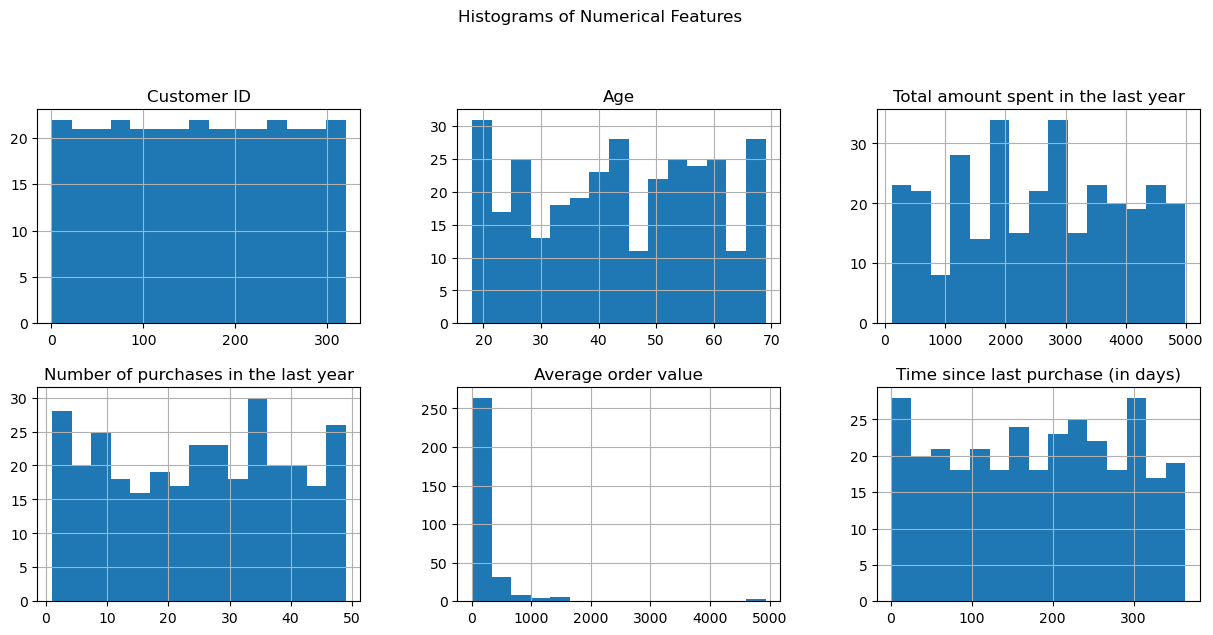

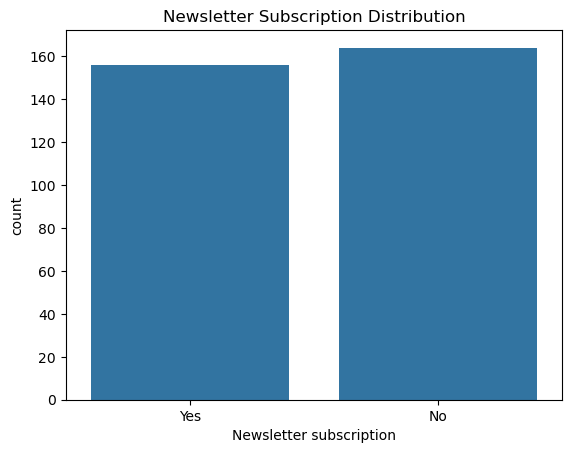

In [9]:
# Univariate Analysis

# Histograms for numerical features
data.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Countplot for categorical features
sns.countplot(x='Newsletter subscription', data=data)
plt.title('Newsletter Subscription Distribution')
plt.show()

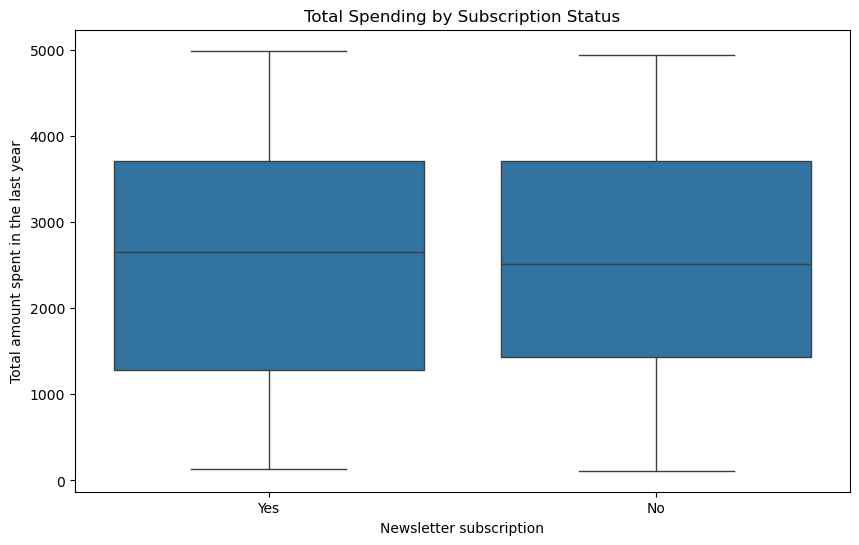

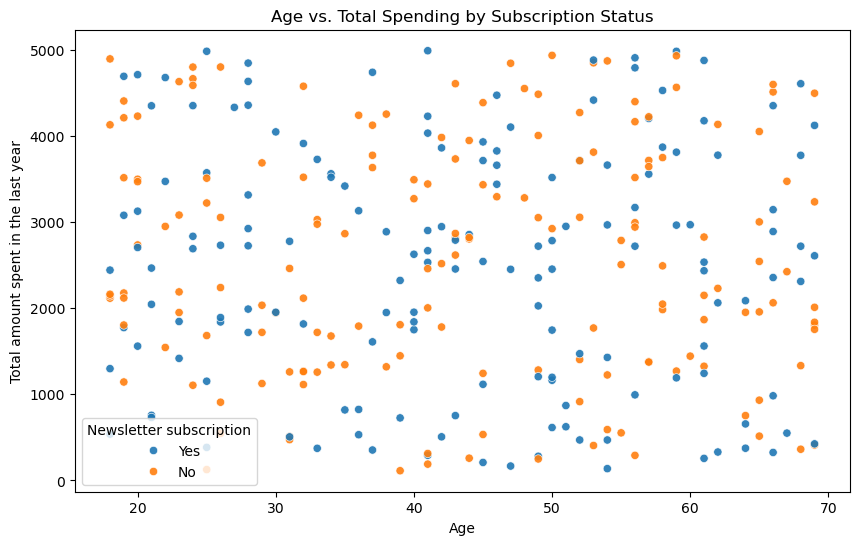

In [15]:
# Bivariate Analysis
# Boxplots to compare spending between subscribers and non-subscribers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Newsletter subscription', y='Total amount spent in the last year', data=data)
plt.title('Total Spending by Subscription Status')
plt.show()

# Scatter plot for age vs. total spending colored by subscription status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total amount spent in the last year', hue='Newsletter subscription', data=data, alpha=0.9)
plt.title('Age vs. Total Spending by Subscription Status')
plt.show()

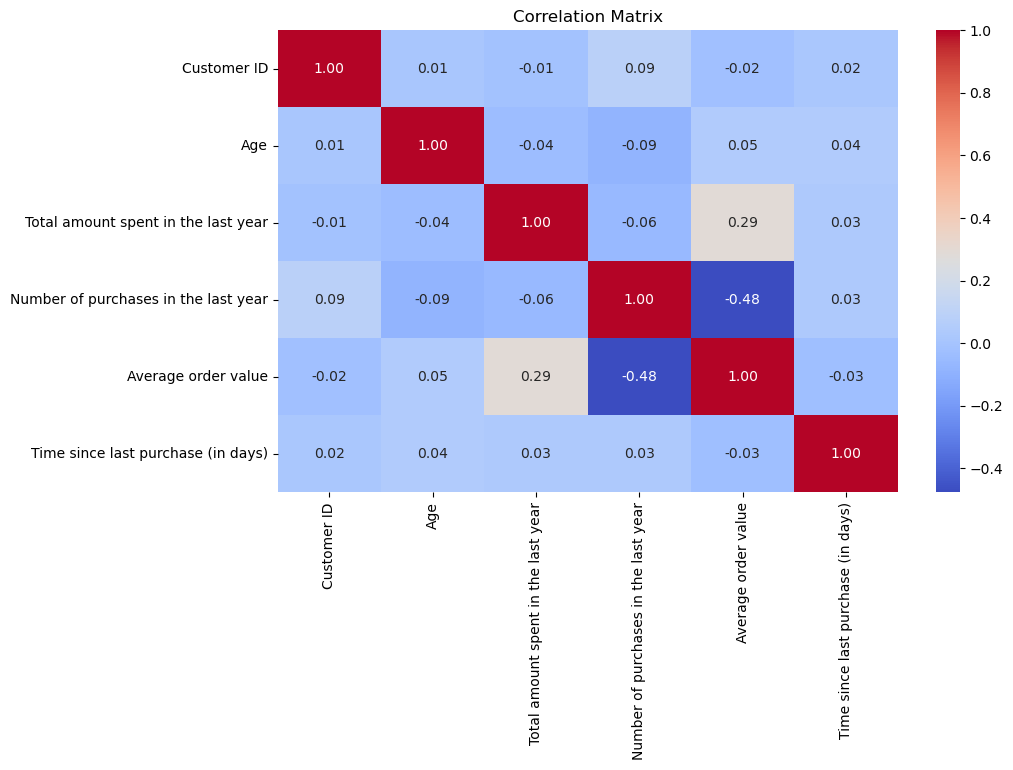

In [17]:
# Correlation Matrix

# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Question 1. Identify the Key Factors that Contribute to Total Spending
# Prepare data for regression
X = data[['Age', 'Number of purchases in the last year', 'Average order value', 'Time since last purchase (in days)']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numerical
y = data['Total amount spent in the last year']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Output coefficients
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Key Factors Contributing to Total Spending:")
print(coef_df)

Key Factors Contributing to Total Spending:
                                      Coefficient
Age                                     -3.268693
Number of purchases in the last year     5.451021
Average order value                      0.697192
Time since last purchase (in days)       0.634894


### Question 1 Summary:
The coefficients from the regression model indicate the relationship between each independent variable and the dependent variable (Total amount spent in the last year).

Age:
Coefficient: -3.27
Interpretation: For each additional year in age, total spending decreases by approximately $3.27, suggesting that older customers tend to spend less on average in this dataset.

Number of Purchases in the Last Year:
Coefficient: 5.45
Interpretation: Each additional purchase made by a customer is associated with an increase of approximately $5.45 in total spending. This indicates that higher purchase frequency correlates with higher overall spending.

Average Order Value:
Coefficient: 0.70
Interpretation: For every $1 increase in the average order value, total spending increases by approximately $0.70. This highlights the importance of encouraging customers to buy higher-priced items.

Time Since Last Purchase (in days):
Coefficient: 0.63
Interpretation: Each additional day since the last purchase is associated with an increase of approximately $0.63 in total spending. This suggests that longer gaps since the last purchase may correlate with higher spending when the customer returns, possibly due to accumulated needs or a desire to restock.

2. Key Insights
Negative Impact of Age: The negative coefficient for age suggests that marketing strategies may need to target younger demographics more effectively to drive higher spending.

Positive Impact of Purchase Frequency: The significant positive relationship between the number of purchases in the last year and total amount spent in the last year emphasizes the importance of strategies aimed at increasing customer retention and purchase frequency.

Encouraging Higher Order Values: The positive correlation between average order value and total spending indicates that initiatives to upsell or cross-sell products could be beneficial.

Re-engagement Opportunities: The relationship between time since the last purchase and spending suggests opportunities for re-engagement campaigns that encourage customers to return after longer gaps.

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Customer ID  Cluster
0            1        2
1            2        0
2            3        0
3            4        0
4            5        0


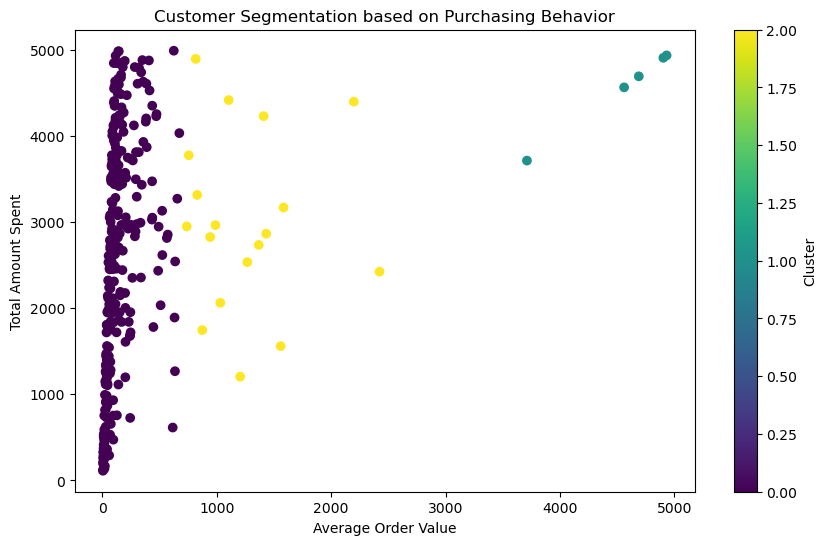

In [21]:
#Question 2. Segment the customers into distinct groups based on their purchasing behaviour

# Using threadpoolctl to limit the number of threads
threadpoolctl.threadpool_limits(limits={'ALL': 2})

X = data[['Age', 'Number of purchases in the last year', 'Average order value', 'Time since last purchase (in days)']]
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
print(data[['Customer ID', 'Cluster']].head())

# Visualization of the result
plt.figure(figsize=(10, 6))
plt.scatter(data['Average order value'], data['Total amount spent in the last year'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation based on Purchasing Behavior')
plt.xlabel('Average Order Value')
plt.ylabel('Total Amount Spent')
plt.colorbar(label='Cluster')
plt.show()

In [23]:
# Question 3. Determine if there's a significant difference in Spending Patterns between Subscribers vs. Non-subscribers
subscribers = data[data['Newsletter subscription'] == 'Yes']
non_subscribers = data[data['Newsletter subscription'] == 'No']

t_stat, p_value = ttest_ind(subscribers['Total amount spent in the last year'], 
                             non_subscribers['Total amount spent in the last year'])

print("\nT-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.4064304081719388
P-value: 0.6846997618304194


### Question 3 result interpretation.
Since the p-value (0.6847) is greater than the significance level (0.05), we fail to reject the null hypothesis. 
This means there is no significant difference in spending patterns between subscribers and non-subscribers statistically.

### Question 4. Propose a data-driven marketing strategy to increase customer engagement and sales based on my findings.

### ANSWER
1. Target Older Customers: Develop targeted marketing campaigns aimed at older customers, possibly through social media or influencer partnerships, to increase engagement and spending.
2. Loyalty and Retention Programs: Implement loyalty programs that reward frequent purchases to capitalize on the positive impact of purchase frequency.
3. Upselling and Promotions: Focus on increasing average order values by promoting higher-priced items or bundles through email marketing or website recommendations.
4. Re-engagement Campaigns: Create targeted re-engagement campaigns for customers who haven’t made purchases recently, offering incentives to encourage them to return.

In [33]:
import nbformat
from nbconvert import HTMLExporter

with open('Ecommerce Dataset.ipynb') as f:
    notebook = nbformat.read(f, as_version=4)

html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook)

with open('Ecommerce Dataset.html', 'w') as f:
    f.write(body)